In [1]:
# library import 
import pandas as pd
import numpy as np 


import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score

In [200]:
data_path = 'dataset 2/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
data = pd.read_csv(data_path)
data.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [201]:
data[data.columns[0]].unique()

array(['192.168.10.5-104.16.207.165-54865-443-6',
       '192.168.10.5-104.16.28.216-55054-80-6',
       '192.168.10.5-104.16.28.216-55055-80-6', ...,
       '192.168.10.3-192.168.10.8-445-10414-6',
       '192.168.10.3-192.168.10.8-53-51617-17',
       '192.168.10.8-72.21.81.253-10398-443-6'], dtype=object)

In [202]:
data.shape

(225745, 85)

In [203]:
data[' Label'].value_counts()

DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64

{'Flow ID': 'Flow ID',
 ' Source IP': 'Source IP',
 ' Source Port': 'Source Port',
 ' Destination IP': 'Destination IP',
 ' Destination Port': 'Destination Port',
 ' Protocol': 'Protocol',
 ' Timestamp': 'Timestamp',
 ' Flow Duration': 'Flow Duration',
 ' Total Fwd Packets': 'Total Fwd Packets',
 ' Total Backward Packets': 'Total Backward Packets',
 'Total Length of Fwd Packets': 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets': 'Total Length of Bwd Packets',
 ' Fwd Packet Length Max': 'Fwd Packet Length Max',
 ' Fwd Packet Length Min': 'Fwd Packet Length Min',
 ' Fwd Packet Length Mean': 'Fwd Packet Length Mean',
 ' Fwd Packet Length Std': 'Fwd Packet Length Std',
 'Bwd Packet Length Max': 'Bwd Packet Length Max',
 ' Bwd Packet Length Min': 'Bwd Packet Length Min',
 ' Bwd Packet Length Mean': 'Bwd Packet Length Mean',
 ' Bwd Packet Length Std': 'Bwd Packet Length Std',
 'Flow Bytes/s': 'Flow Bytes/s',
 ' Flow Packets/s': 'Flow Packets/s',
 ' Flow IAT Mean': 'Flow IAT Mea

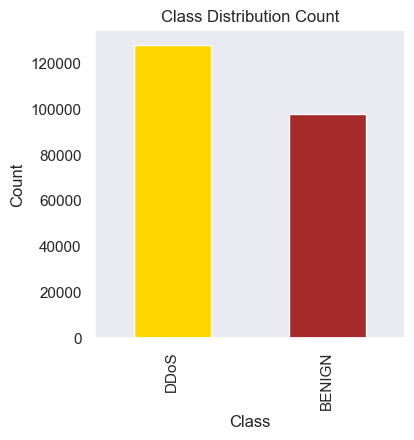

In [204]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set_theme(style="darkgrid") 
plt.figure(figsize=(4,4))
data[' Label'].value_counts().plot(kind='bar', color=['gold', 'brown'])
plt.title('Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()
# stripping columns.... 
new_col = {}
for col in data.columns: 
    new_col[col] = col.strip()

new_col

In [205]:
# updating dataframe
data.rename(columns=new_col, inplace=True)
data.columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225745 non-null  object 
 1   Source IP                    225745 non-null  object 
 2   Source Port                  225745 non-null  int64  
 3   Destination IP               225745 non-null  object 
 4   Destination Port             225745 non-null  int64  
 5   Protocol                     225745 non-null  int64  
 6   Timestamp                    225745 non-null  object 
 7   Flow Duration                225745 non-null  int64  
 8   Total Fwd Packets            225745 non-null  int64  
 9   Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets  225745 non-null  int64  
 11  Total Length of Bwd Packets  225745 non-null  int64  
 12  Fwd Packet Length Max        225745 non-null  int64  
 13 

In [206]:
data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_19300\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Source Port,1.000000,-0.727093,0.193702,0.066677,0.046492,-0.005598,-0.376220,0.053109,-0.415225,-0.183577,...,0.053464,0.051752,0.035426,0.015362,0.037363,0.034631,0.051217,0.040340,0.055066,0.037903
Destination Port,-0.727093,1.000000,-0.183045,0.107038,-0.044270,0.008321,0.553843,-0.066648,0.604586,0.207158,...,-0.051366,-0.074278,0.061313,-0.026592,0.043156,0.066356,0.132272,0.110687,0.144428,0.095687
Protocol,0.193702,-0.183045,1.000000,-0.194691,-0.077461,-0.052777,-0.107639,-0.060670,-0.109536,0.038159,...,-0.074932,0.474116,-0.096252,-0.033096,-0.099233,-0.092237,-0.169636,-0.116058,-0.176677,-0.133858
Flow Duration,0.066677,0.107038,-0.194691,1.000000,0.207660,0.145272,0.297832,0.088751,0.280808,-0.055700,...,0.194295,-0.112832,0.428397,0.148295,0.446759,0.413835,0.871855,0.630604,0.919199,0.672003
Total Fwd Packets,0.046492,-0.044270,-0.077461,0.207660,1.000000,0.956714,0.174396,0.938470,0.041866,-0.038103,...,0.882270,-0.005388,0.135892,0.285131,0.223377,0.087692,0.110787,0.056807,0.109429,0.094747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,0.034631,0.066356,-0.092237,0.413835,0.087692,0.063551,0.171280,0.046830,0.156816,-0.035780,...,0.082623,-0.055221,0.982673,-0.003429,0.868071,1.000000,0.602021,-0.058847,0.469089,0.690201
Idle Mean,0.051217,0.132272,-0.169636,0.871855,0.110787,0.065554,0.261110,0.042256,0.272060,-0.039715,...,0.114726,-0.139772,0.595859,0.022025,0.531538,0.602021,1.000000,0.420170,0.952585,0.910822
Idle Std,0.040340,0.110687,-0.116058,0.630604,0.056807,0.028627,0.216771,0.020081,0.230387,-0.048230,...,0.059977,-0.099363,-0.057820,-0.003866,-0.055222,-0.058847,0.420170,1.000000,0.676276,0.008218
Idle Max,0.055066,0.144428,-0.176677,0.919199,0.109429,0.062932,0.284694,0.041055,0.298035,-0.048410,...,0.113394,-0.146873,0.464725,0.017842,0.413812,0.469089,0.952585,0.676276,1.000000,0.742109


In [207]:
print(data.Label.unique())
print('Null Count: ', data.isnull().sum().sum())

['BENIGN' 'DDoS']
Null Count:  4


In [208]:
print(data.shape)
data = data[data['Flow Bytes/s'].isnull() == False]
print(data.shape)

(225745, 85)
(225741, 85)


In [209]:
for col in data.columns: 
    if data[col].dtype == 'object': 
        data[col] = data[col].astype('category').cat.codes

data.info()

data.Label.unique()
duplicate = data.duplicated().sum()
print('Duplicate: ', duplicate)

data.drop_duplicates(keep='first', inplace=True)
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225741 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225741 non-null  int32  
 1   Source IP                    225741 non-null  int16  
 2   Source Port                  225741 non-null  int64  
 3   Destination IP               225741 non-null  int16  
 4   Destination Port             225741 non-null  int64  
 5   Protocol                     225741 non-null  int64  
 6   Timestamp                    225741 non-null  int8   
 7   Flow Duration                225741 non-null  int64  
 8   Total Fwd Packets            225741 non-null  int64  
 9   Total Backward Packets       225741 non-null  int64  
 10  Total Length of Fwd Packets  225741 non-null  int64  
 11  Total Length of Bwd Packets  225741 non-null  int64  
 12  Fwd Packet Length Max        225741 non-null  int64  
 13 

(225739, 85)

In [210]:
print(np.isinf(data).sum().sum())
for col in data.columns: 
    if np.isinf(data[col]).sum() > 0:
        print(col, ' : ' , np.isinf(data[col]).sum())


data = data[np.isinf(data['Flow Bytes/s']) != True]
data = data[np.isinf(data['Flow Packets/s']) != True]
data.shape

60
Flow Bytes/s  :  30
Flow Packets/s  :  30


(225709, 85)

In [211]:
# reconfirming the ini file...... 
print(np.isinf(data).sum().sum())
for col in data.columns: 
    if np.isinf(data[col]).sum() > 0:
        print(col, ' : ' , np.isinf(data[col]).sum())


0


In [212]:
# further processing, creating fragment of data 
data.sample(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
53513,6768,426,19588,867,80,6,30,7417105,5,0,...,20,1609.0,0.0,1609,1609,7415496.0,0.0,7415496,7415496,1
36822,34240,426,53014,867,80,6,28,6099864,4,0,...,20,1013.0,0.0,1013,1013,6098851.0,0.0,6098851,6098851,1
85817,44902,426,63676,867,80,6,33,1629583,3,4,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [213]:
df = data 

In [198]:
data = data.sample(20000)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [181]:
for col in data.columns: 
    if data[col].dtype == 'float64': 
        data[col] = data[col].astype('int32')
        # print(data[col].unique())

X, y  = data.drop(columns=['Label']) , data.Label
X.shape

(10000, 84)

In [182]:
# dimentionality reduction using PCA
from sklearn.decomposition import PCA

pca  = PCA(n_components=4)
X_reduce = pca.fit_transform(X)
X_reduce.shape 

(10000, 4)

In [183]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# minmax = MinMaxScaler()
# rob_scaler = RobustScaler()
st_scaler = StandardScaler()


# # fit resample 
# x_scall = minmax.fit_transform(X)
# x_scall = rob_scaler.fit_transform(X)

# standard scalling
x_scall = st_scaler.fit_transform(X)
x_scall

array([[-1.23964123e+00, -6.65410058e-01, -4.87560694e-01, ...,
        -2.72165918e-01, -1.76641876e-01,  6.55195335e-04],
       [-1.22487920e+00, -6.65410058e-01, -4.74640886e-01, ...,
        -2.72165918e-01, -4.79358227e-01, -3.97913241e-01],
       [-3.09534007e-01, -6.65410058e-01,  5.84609880e-01, ...,
        -2.72165918e-01, -4.79358227e-01, -3.97913241e-01],
       ...,
       [-8.84361671e-01,  7.60946052e-01, -1.65675989e+00, ...,
        -2.72165918e-01, -1.27456332e-01,  6.54148469e-02],
       [ 4.00983312e-02, -6.65410058e-01,  8.90609876e-01, ...,
         2.98884542e+00,  2.03317923e+00,  1.27492013e-01],
       [-1.79960779e+00, -6.65410058e-01, -9.77646264e-01, ...,
        -2.72165918e-01, -4.79358227e-01, -3.97913241e-01]])

In [143]:
print(y.shape)
x_scall.shape

(10000,)


(10000, 84)

In [131]:
from imblearn.under_sampling import TomekLinks

In [184]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN


smote = SMOTE()
# smote = TomekLinks()
X_resampled, y_resampled = smote.fit_resample(x_scall, y)

In [185]:
print(X_resampled.shape)
print(y_resampled.shape)

(11304, 84)
(11304,)


<Figure size 400x400 with 0 Axes>

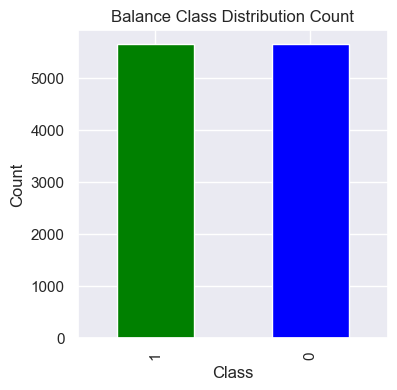

In [186]:
import seaborn as sn 
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
sn.set_style(style='darkgrid')
plt.figure(figsize=(4,4))
y_resampled.value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title('Balance Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()
plt.grid()

In [187]:
y_resampled.value_counts()

1    5652
0    5652
Name: Label, dtype: int64

(9043, 84)


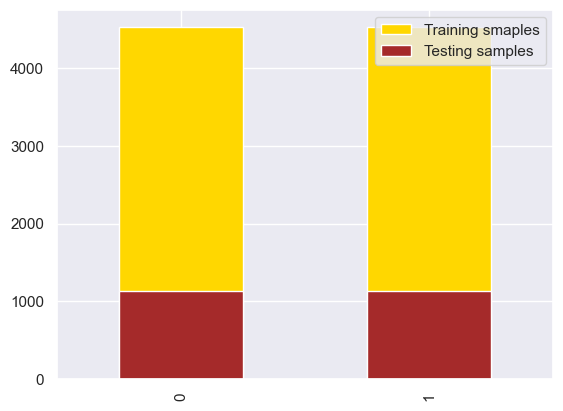

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, shuffle=True)
print(X_train.shape)
y_train.value_counts().plot(kind='bar', color=['gold', 'gold'])
y_test.value_counts().plot(kind='bar', color=['brown', 'brown'])
plt.legend(labels=['Training smaples', 'Testing samples'])

In [189]:
def compute_metrics(tp, fp, fn, tn, avg_detection_time=None):

    # Safety check to prevent division by zero
    total = tp + fp + fn + tn
    positive = tp + fn
    negative = tn + fp

    # Metrics calculations
    tpr = tp / positive if positive > 0 else 0  # True Positive Rate (Recall)
    fpr = fp / negative if negative > 0 else 0  # False Positive Rate
    fnr = fn / positive if positive > 0 else 0  # False Negative Rate
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tpr  # Recall is the same as TPR
    specificity = tn / negative if negative > 0 else 0
    accuracy = (tp + tn) / total if total > 0 else 0

    # Pack into dictionary
    metrics = {
        "TPR (Recall)": tpr,
        "FPR": fpr,
        "FNR": fnr,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "AVG EXE TIME": f'{avg_detection_time:.8f}'
    }

    return metrics  

In [190]:
# mergin everything...
class DBN_network: 

    def __init__(self, neurons=100, learning_rate=0.8, epoch=4): 
        self.neurons = neurons
        self.learning_rate=learning_rate 
        self.epoch = epoch
        self.layers_objects = []
        print('parameter initialize...')

    def config_network(self, neurons, layers=2, learning_rate=0.8):
        self.layers_objects = []
        if layers != len(neurons):
            print(f' Neuron List Value {len(neurons)} must equal Layer value {layers} layers')
        else: 
            for ep in range(layers): 
                # print(f' \n Epoch : {ep}')
                ly = BernoulliRBM(n_components=neurons[ep], learning_rate=learning_rate, n_iter=4, verbose=1)
                self.layers_objects.append(ly)
                # print(ly)

            # specify the classification head
            classifier = LogisticRegression(max_iter=1000)
            self.layers_objects.append(classifier)
            
   # to visualize the architecture using pipeline
    def summary(self):
        # using pipeline to visualize the DBN Architecture.... 
        arch_list = []
        for item in range(len(self.layers_objects)):
            arch_list.append((f'layer_{item+1}', self.layers_objects[item]))
        
        self.arch_summary = Pipeline(
            arch_list
        )

        print('DBN architecture Summary')
        return self.arch_summary

    # function to train the model... 
    def fit_model(self, X_train, y_train): 
        print(f'Training For {len(self.layers_objects[:-1])} Layer')
        self.fited_arch = []
        init_sample = X_train
        init_y = y_train
        count = 0 
        for layer in self.layers_objects[:-1]:
            print(f'\n *******************  EPOCH {count + 1} **********************')
            # fit and transform....  
            fited = layer.fit(init_sample)
            feature  = fited.transform(init_sample)
        
            # update weights
            init_sample = feature
        
            # store layer weights
            self.fited_arch.append(fited)
            count = count + 1
            
        # fit the classification head 
        print('\n+-----------------------------------------+')
        self.class_head = self.layers_objects[-1].fit(init_sample, init_y)
        
        return self.arch_summary

    # prediction  function 
    def predict(self, X_test, y_test): 
        init_sample = X_test
        init_y = y_test
        for layer in self.fited_arch:
            
            # transform....  
            feature  = layer.transform(init_sample)
            
            # update weights
            init_sample = feature
            print(f'Calculated Feature {init_sample.shape}')
                           
        # fit the classification head 
        if self.fited_arch != []: 
            prediction = self.class_head.predict(init_sample)
            pre = {'pre': prediction}
            return pre
        else: 
            error = 'Error: model should be trained first....'
            return {error, []}


In [194]:
# initializaing DBN
dbn = DBN_network()
# configure the DBN... 
dbn.config_network([84, 84, 42, 42, 12], layers=5, learning_rate=0.1)

# showing the DBN architecture.. 
dbn.summary()

parameter initialize...
DBN architecture Summary


Pipeline(steps=[('layer_1', BernoulliRBM(n_components=84, n_iter=4, verbose=1)),
                ('layer_2', BernoulliRBM(n_components=84, n_iter=4, verbose=1)),
                ('layer_3', BernoulliRBM(n_components=42, n_iter=4, verbose=1)),
                ('layer_4', BernoulliRBM(n_components=42, n_iter=4, verbose=1)),
                ('layer_5', BernoulliRBM(n_components=12, n_iter=4, verbose=1)),
                ('layer_6', LogisticRegression(max_iter=1000))])

In [195]:
# training the architecture
import time 
strt_time = time.time()
dbn.fit_model(X_train, y_train)
stop_time = time.time()

data_1_total_training_time = stop_time - strt_time
print('Total Training Time : ', data_1_total_training_time)

Training For 5 Layer

 *******************  EPOCH 1 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -837.11, time = 1.92s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2062.45, time = 0.83s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -3668.47, time = 1.37s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -4342.21, time = 1.31s

 *******************  EPOCH 2 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -7.08, time = 1.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.09, time = 2.49s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.35, time = 0.77s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -0.40, time = 0.77s

 *******************  EPOCH 3 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -0.81, time = 1.12s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2.89, time = 0.56s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.14, time = 0.54s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -0.17, tim

Calculated Feature (2261, 84)
Calculated Feature (2261, 84)
Calculated Feature (2261, 42)
Calculated Feature (2261, 42)
Calculated Feature (2261, 12)

EXE TIME
Total Detection Time : 0.125020
AVG Detection Time : 0.00005529 

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1131
           1       0.75      0.66      0.70      1130

    accuracy                           0.72      2261
   macro avg       0.72      0.72      0.72      2261
weighted avg       0.72      0.72      0.72      2261





<Axes: >

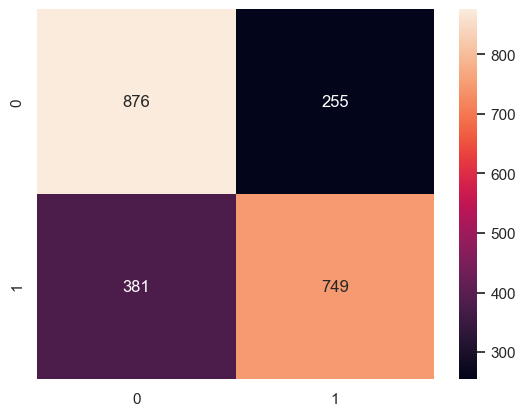

In [197]:
# make prediction
strt_time = time.time()
prediction = dbn.predict(X_test, y_test)
stop_time = time.time()

print('\nEXE TIME')
total_time  = stop_time - strt_time
avg_time = total_time / X_test.shape[0]
print(f'Total Detection Time : {total_time:.6f}')
print(f'AVG Detection Time : {avg_time:.8f} \n')

# evaluation report 
class_report = classification_report(y_test, prediction['pre'])
conf_report = confusion_matrix(y_test, prediction['pre'])
print(class_report)
print('\n')
sn.heatmap(conf_report, fmt='d', annot=True)